<a href="https://colab.research.google.com/github/muxair080/plant_disease_detection_streamlit_app/blob/main/tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tomato Disease Classification



*  **Author:** Muhammad Uzair
*  **Email:** uzair1kk2019@gmail.com

*  **Github:** https://github.com/muxair080
*  **Portfolio:** https://muxair080.netlify.app/








In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Download Dataset from kaggle using api command

In [2]:
!kaggle datasets download -d arjuntejaswi/plant-village

100% 327M/329M [00:02<00:00, 167MB/s]
100% 329M/329M [00:02<00:00, 137MB/s]


# Unzip Dataset Folder

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/plant-village.zip')
zip_ref.extractall('/content')
zip_ref.close()

In the downloaded dataset has some more plants images also the bellow code is deleting extra folders from the dataset directory.

In [5]:
import os
import shutil

# Set the path to the dataset directory
dataset_dir = "/content/PlantVillage"

# List all directories in the dataset
directories = [f for f in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, f))]

# Specify the directories you want to delete
directories_to_delete = ["Pepper__bell___Bacterial_spot","Pepper__bell___healthy","Potato___Late_blight",
                         "Potato___Early_blight","Potato___healthy"]

# Iterate over the directories and delete them along with their contents
for directory in directories_to_delete:
    directory_path = os.path.join(dataset_dir, directory)
    if os.path.exists(directory_path):
        shutil.rmtree(directory_path)
        print(f"Deleted directory: {directory_path}")
    else:
        print(f"Directory not found: {directory_path}")


Deleted directory: /content/PlantVillage/Pepper__bell___Bacterial_spot
Deleted directory: /content/PlantVillage/Pepper__bell___healthy
Deleted directory: /content/PlantVillage/Potato___Late_blight
Deleted directory: /content/PlantVillage/Potato___Early_blight
Deleted directory: /content/PlantVillage/Potato___healthy


# Load Dependencies

I have built this project in python language using numpy, sklearn, tensorflow and opencv libraries

In [33]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout, MaxPooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import models, layers
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
import cv2
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf

# Directories & Classes

These are the path of the dataset innter folders and classes in the given dataset

In [13]:
DIRECTORY = r'/content/'
FOLDERS = ['PlantVillage']
CLASSES = ['Tomato_healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Leaf_Mold',
 'Tomato_Bacterial_spot',
 'Tomato_Late_blight',
 'Tomato_Early_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus']

# Load Data
the given code is loading the training and validation data from the dataset and convert these images to array with the size of 150x150 and append each image  datain train_data, and val_data list. I have loaded just 2500 images from eaach class due to limitted resources.

# Set All Constants

In [92]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=20

In [110]:
data = []
for folder in FOLDERS:
  folder_path = os.path.join(DIRECTORY, folder)
  for classification in CLASSES:
    image_path = os.path.join(folder_path, classification)
    images = os.listdir(image_path)
    images = images[:500]
    for image in images:
      try:
        image_url = os.path.join(image_path, image)
        arr = cv2.imread(image_url)
        arr = cv2.resize(arr, (IMAGE_SIZE,IMAGE_SIZE))
        label = CLASSES.index(classification)
        data.append([arr, label])
      except Exception as e:
        print("Error : ",e)

In [111]:
print(len(data))

4873


# Mix Images of both classes
In the above list the image is append in squence at the top inital images are fractured bones and the remaining are not fractrued bone to train model in best way i have suffle the images

In [112]:
import random
random.shuffle(data)

# Seperate Dependent & Indeendent Features

In [113]:
X = []
y = []
for feature, label in data:
  X.append(feature)
  y.append(label)

In [114]:
X = np.array(X)
y = np.array(y)

In [115]:
X.shape

(4873, 256, 256, 3)

In [116]:
y.shape

(4873,)

In [117]:
from sklearn.model_selection import train_test_split

# Assuming you have your data stored in X and corresponding labels in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# Normalize Data
Normalize the data that model give us best results

In [118]:
# X = X/255
resize_and_recale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

# Data Augmentation

In [74]:
# datagen = ImageDataGenerator(
#     # Specify the augmentation transformations you want to apply
#     rotation_range=10,  # Rotate images randomly by 10 degrees
#     width_shift_range=0.1,  # Shift images horizontally by 10% of the width
#     height_shift_range=0.1,  # Shift images vertically by 10% of the height
#     horizontal_flip=True,  # Flip images horizontally
#     vertical_flip=False  # Disable vertical flipping
# )
# # Fit the ImageDataGenerator on your training data
# datagen.fit(X_train)

# # Generate augmented data
# augmented_data = datagen.flow(X_train, y_train, batch_size=32)


# Build CNN Model

In [119]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [120]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=10
model = models.Sequential([
    resize_and_recale,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

# Compile Model

In [121]:
model.compile(
              loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [122]:
# model.summary()

In [123]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the checkpoint callback
# checkpoint_callback = ModelCheckpoint(filepath='best_model_weights.h5',
#                                       save_best_only=True,
#                                       save_weights_only=True,
#                                       monitor='val_loss',
#                                       mode='min',
#                                       verbose=1)

In [125]:
r = model.fit(X_train,y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
110/110 [==============================] - 7s 67ms/step - loss: 0.4186 - accuracy: 0.8475 - val_loss: 0.5418 - val_accuracy: 0.8096
Epoch 2/20
110/110 [==============================] - 7s 60ms/step - loss: 0.3484 - accuracy: 0.8797 - val_loss: 0.7001 - val_accuracy: 0.7731
Epoch 3/20
110/110 [==============================] - 7s 60ms/step - loss: 0.2745 - accuracy: 0.9036 - val_loss: 0.6160 - val_accuracy: 0.8039
Epoch 4/20
110/110 [==============================] - 7s 60ms/step - loss: 0.2398 - accuracy: 0.9108 - val_loss: 0.6406 - val_accuracy: 0.7879
Epoch 5/20
110/110 [==============================] - 7s 60ms/step - loss: 0.2302 - accuracy: 0.9193 - val_loss: 0.5989 - val_accuracy: 0.8016
Epoch 6/20
110/110 [==============================] - 7s 62ms/step - loss: 0.2225 - accuracy: 0.9188 - val_loss: 0.6701 - val_accuracy: 0.7891
Epoch 7/20
110/110 [==============================] - 7s 60ms/step - loss: 0.1454 - accuracy: 0.9515 - val_loss: 0.7341 - val_accuracy: 0.8039

# Test Accuracy

Split Dependent and Indepndent features of validation data

In [127]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

16/16 [==============================] - 1s 37ms/step - loss: 0.5617 - accuracy: 0.8627


# Vissulize Accuracy and Loss

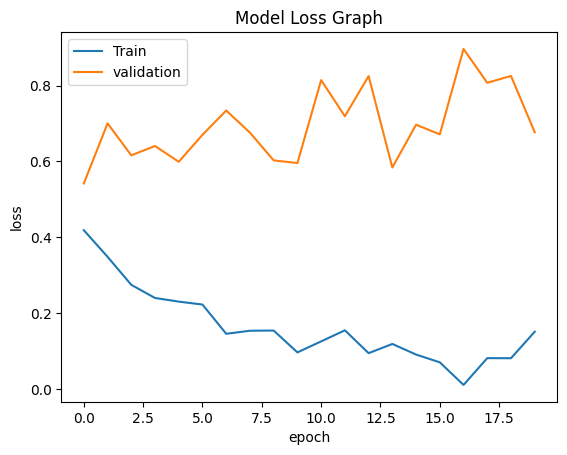

In [128]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model Loss Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','validation',],loc='upper left')
plt.show()

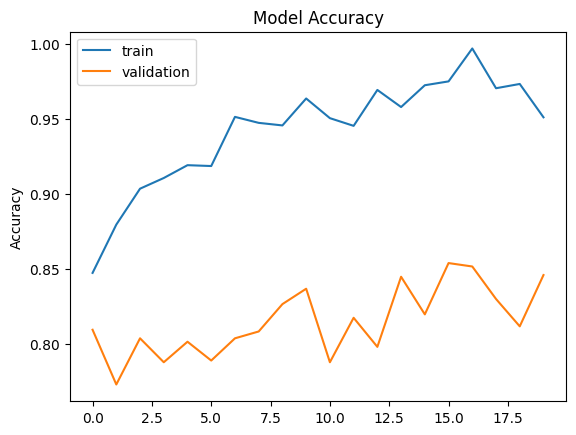

In [129]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [133]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)

    predicted_class = CLASSES[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

(488, 256, 256, 3)

1/1 [==============================] - 0s 48ms/step


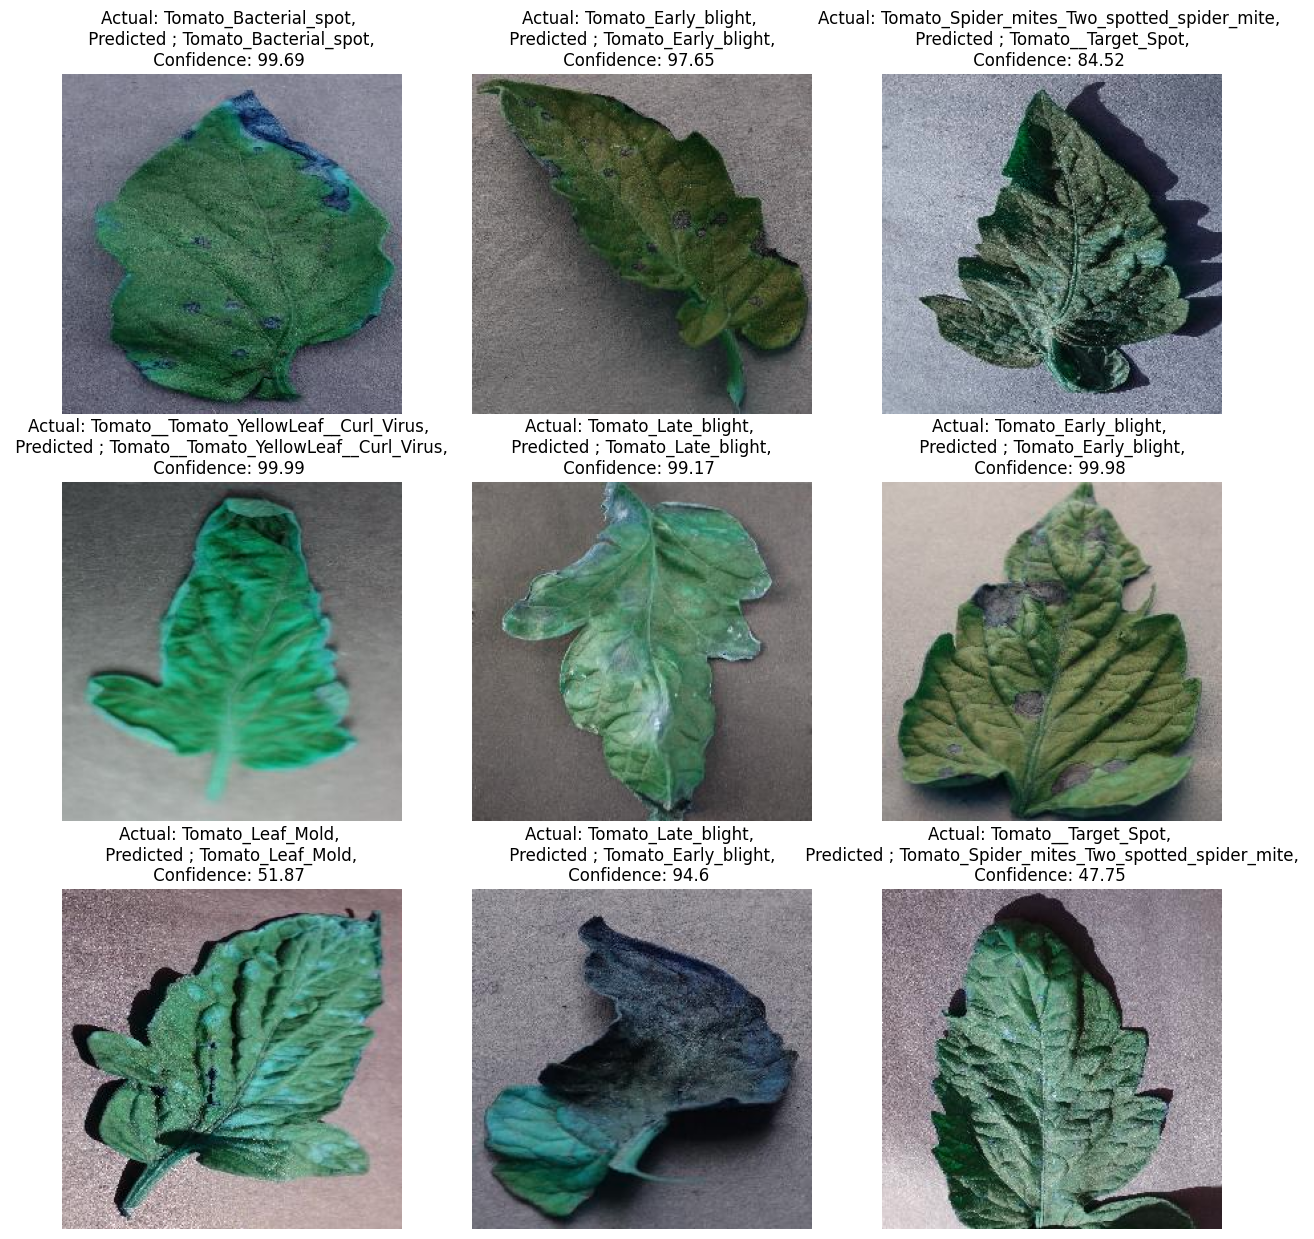

In [147]:
plt.figure(figsize=(15,15))
for index, image in enumerate(X_test):
        if index <9:

          # i = index+1
          ax = plt.subplot(3,3, index+1)
          # # plt.imshow(images[i].numpy().astype('uint8'))
          plt.imshow(image)
          predicted_class , confidence = predict(model, image)
          label = y_test[index]
          actual_class = CLASSES[label]
          plt.title(f'Actual: {actual_class}, \n Predicted ; {predicted_class}, \n Confidence: {confidence}  ')
          plt.axis('off')
        else:
          break


In [130]:
import os
model_version = max(int(i) for i in os.listdir('/content/trained_models')+[0])+1
model.save(f'/content/trained_models/{model_version}')

In [131]:
model.save("/content/potatoes.h5")

In [148]:
import os
import zipfile

zf = zipfile.ZipFile("/content/myzipfile.zip", "w")
for dirname, subdirs, files in os.walk("/content/trained_models"):
    zf.write(dirname)
    for filename in files:
        zf.write(os.path.join(dirname, filename))
zf.close()